
# Projet: Manipuler une Base De Données en utilisant le SGBD MySQL

> Jusqu’à la fin des années 90, les quantités de données produites par les systèmes informatiques restaient relativement limitées. Le système de gestion de base de données relationnelles (SGBDR) était devenu la référence pour le stockage de données, sans avoir été remis en cause durant des années car il répondait à 90 % des besoins. Et quand les entreprises s’échangeaient des données entre elles, elles le faisaient au travers de flux de données normalisés et structurés.

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data_pres">Présentation de la base de données</a></li>
<li><a href="#steps">Étapes de l'intégration du SGBD MySQL</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
# Introduction

> MySQL est un système de gestion de bases de données relationnelles (SGBDR) open-source, qui est très utilisé pour la construction et la gestion d'applications web. Il est connu pour sa fiabilité, sa flexibilité et sa facilité d'utilisation. MySQL utilise le langage de programmation SQL pour gérer et manipuler les données, et offre une gamme de fonctionnalités pour le stockage, la récupération et la gestion des données. A travers ce travail pratique, nous allons intégrer ce sgbd dans jupyter notebook et l'utiliser pour manipluer et intrroger notre base de données. 

<a id='data_pres'></a>
# Présentation de la base de donnée

La base de données relationnelle exploités dans ce travail pratique contient les données de la ligue nationale de footbal, structurés selon six tables:
- Table equipe: contient les attributs sigle, couleurs et nom du club ainsi que le numéro de la wilaya à laquelle il appartient. 
- Table wilya: contient les correspondances code et nom des wilayas. 
- Table stade: contient les attributs nom du stade, son identifiant et son code wilaya. 
- Table rencontre: contient les informations relatives aux rencontres de la saison dont les équipes participantes, les buts marqués, le stade qui a accueilli la rencontre et sa date. 
- Table joueur: contient les informations sur les joueurs: leurs numéros, Nom et l'equipe à laquelle ils appartiennent. 
- Table marquer: contient les informations sur les buts marqués durant la saison. Elle fait la laison entre le joueur qui a marqué le but et la rencontre correspondnate. Elle contient de plus, la minute du but. 

Voici le schéma entité association de notre base de données: 

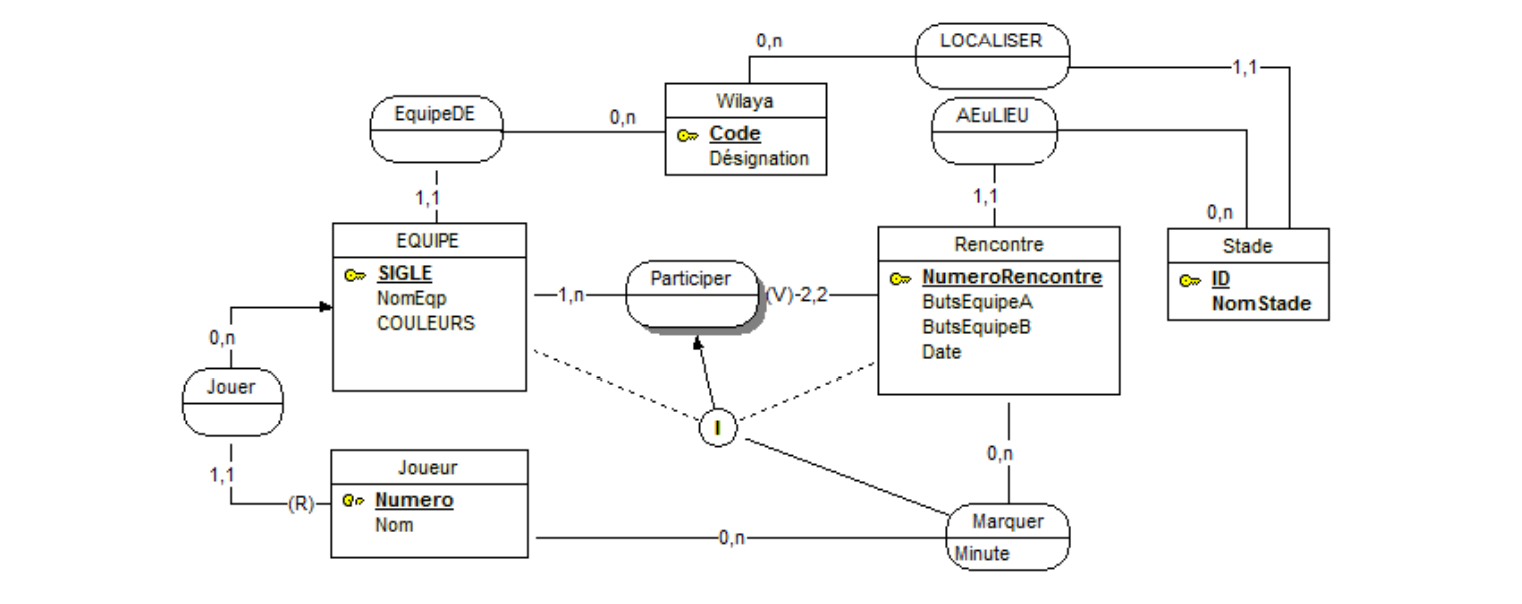

<a id='steps'></a>
# Étapes de l'intégration du SGBD MySQL
Ce travail est structuré selon 3 étapes: 
<ul>
<li><a href="#install">Installation des libraries requises</a></li>
<li><a href="#read">Lire les données de la base de données</a></li>
<li><a href="#analyse">Analyse des requêtes et représentations graphiques</a></li>
</ul>

<a id='install'></a>
## 1: Installation des libraries requises 

● pymysql: Un paquet Python qui crée une interface API pour nous permettre d'accéder à des bases de données relationnelles MySQL. 

● ipython-sql: une extension qui nous permet d'écrire immédiatement des requêtes SQL dans des cellules de code et de lire les résultats dans des DataFrames.

● sqlAlchemy: une bibliothèque Python open-source qui fournit des outils pour travailler avec des bases de données relationnelles, et ce en utilisant des objets Python plutôt que de devoir écrire des requêtes SQL complexes.

In [4]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install sqlAlchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<a id='connect'></a>
## 2: Se connecter à la base de données 

>Pour cela, on utilse les deux bibliothèque installées auparavant qui sont pymysql et sqlalchemy. De plus, on aura besoin de la bib pandas qui va nous permettre de visualiser la data. 

In [2]:
#importing the libraries

#to connect to the database, we are going to use pymysql
import pymysql

#to read data from the database, we are going to use pandas
import pandas as  pd

from sqlalchemy import create_engine
from sqlalchemy import text

In [3]:
#initialize the attributes
db_name = 'bda_db'
db_host = "127.0.0.1"
db_username = "root"
db_password = "manelkadri2079"
port = 3306 #default port of ip adress in mysql

In [4]:
sqlEngine = create_engine(f'mysql+pymysql://{db_username}:{db_password}@{db_host}/{db_name}', pool_recycle=port)
dbConnection = sqlEngine.connect()

In [5]:
#Check the connection to the database
if (dbConnection):
    print("Connection successful")

Connection successful


<a id='read'></a>
## 3: Lire les données de la base de données

In [12]:
sql = text("SELECT * FROM equipe")

In [13]:
df = pd.read_sql(sql, dbConnection)

In [14]:
df.head(10)

,Sigle,NomEqp,Couleurs,Wilaya
0,ASMO,Association sportive madinet d'Oran,BlancVert,31
1,ASOC,Association Sportive Olympique de Chlef,RougeBlanc,2
2,CRB,Chabab Riadhi de Belouizdad,RougeBlanc,16
3,CSC,Club sportif constantinois,VertNoir,25
4,ESS,Entente sportive de Setif,NoirBlanc,19
5,JSK,Jeunesse sportive de Kabylie,JauneVert,15
6,JSS,Jeunesse sportive de la Saoura,VertJaune,8
7,MCA,Mouloudia club d'Alger,VertRouge,16
8,MCEE,Mouloudia Chabab El Eulma,RougeVert,19
9,MCO,Mouloudia Club d Oran,BlancRouge,31


<a id='analyse'></a>
## Analyse des requêtes et représentations graphiques 
Les apects à étudier sont :

<ul>
<li><a href="#stade">Stades ayant accueilli le plus de matchs</a></li>
<li><a href="#players">Meilleurs joueurs de la saison</a></li>
<li><a href="#defense">Equipe avec meilleure défense</a></li>
<li><a href="#attack">Equipe avec meilleure attaque</a></li>
<li><a href="#classement">Classement des equipes</a></li>
</ul>

<a id='stade'></a>
### Stades ayant accueilli le plus de matchs

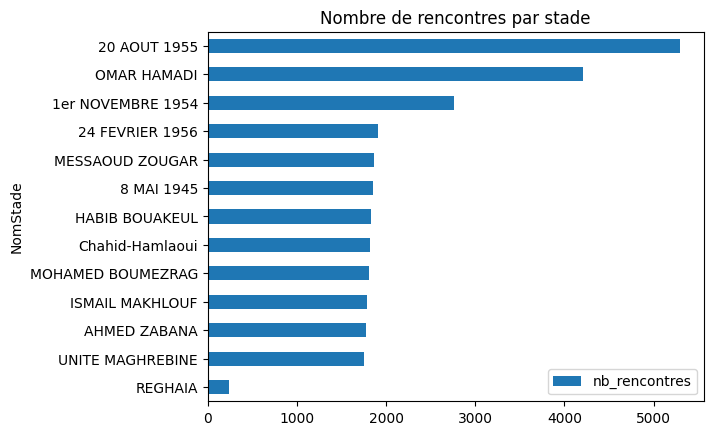

In [15]:
chart = text("SELECT NomStade, sum(NumeroRencontre) as nb_rencontres FROM Stade JOIN rencontre ON Stade.ID = rencontre.Stade Group by NomStade order by nb_rencontres")
df = pd.read_sql(chart, dbConnection)
plot=df.plot.barh(title="Nombre de rencontres par stade",x='NomStade');

> On constate que le stade qui a accueilli le plus de rencontres dans la saison est le stade "20 AOUT 1955", suivi parle stade "OMAR HAMADI" et puis "1er Novembre 1954"...etc. On en déduit qu'il y a un déséquilibre dans la répartition des rencontres sur les stades et donc une mal-organisation de l'exploitation de ces ressources. Cela peut être causé par les autres ne sont pas assez bien équipés, ce présente une problématique à résoudre. 

<a id='players'></a>
### Meilleurs joueurs de la saison
##### joueurs ayant marqué le plus de buts

,Nom,equipe,goals
0,DERRARDJA,MCEE,15
1,BOULEMADAIS,CSC,12
2,Oussama Darfalou,RCA,10
3,Abidi Mohamed Lamine,USMH,8
4,RIAL,JSK,8
5,BELAILI,USMA,8
6,GOURMI,MCA,7
7,DJEMAOUNI,ASMO,7
8,YOUNES,ESS,7
9,CHENIHI,MCEE,7


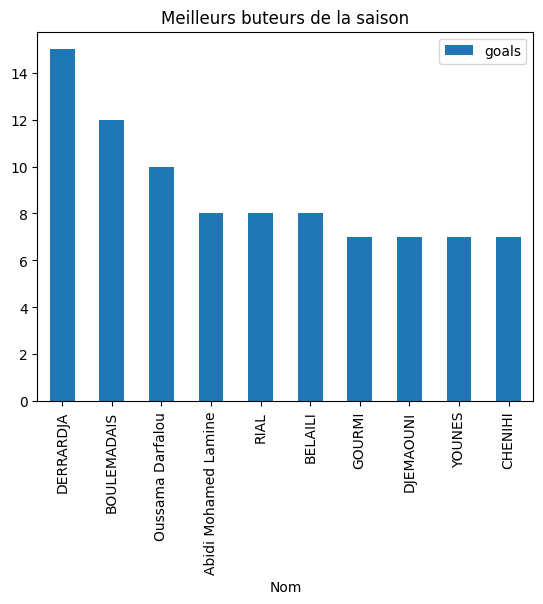

In [16]:
chart = text("SELECT J.Nom,J.equipe, count(Rencontre) as goals FROM Marquer M Join Joueur J ON J.Equipe=M.Equipe And J.Numero=M.numeroJoueur Group By J.Nom order by goals desc limit 10")
df = pd.read_sql(chart, dbConnection)
plot=df.plot.bar(title="Meilleurs buteurs de la saison",x='Nom',stacked=True);
display(df)

> Les joueurs qui ont marqué le plus de buts figurent dans le tableau et visuel au-dessus. On remarque que deux de ces joueurs, "DERRARDJA" et "CHNIHI" jouent pour le club "MCEE"; on peut constater que ce club a plus de chances pour gagner la championnat. 

<a id='buts'></a>
##### joueurs ayant marqué les buts les plus rapides

In [17]:
#Les buts les plus rapides du chompionnat
chart = text("SELECT M.Equipe,J.Numero,j.Nom, M.MinuteBut FROM Marquer M JOIN Joueur J ON J.Equipe=M.Equipe AND J.Numero=M.NumeroJoueur order by MinuteBut")
df = pd.read_sql(chart, dbConnection)
df.head(10)

,Equipe,Numero,Nom,MinuteBut
0,RCA,29,Semahi,1
1,MOB,9,HAMZAOUI,2
2,MOB,18,RAHAL,2
3,USMBA,12,CHOUBANI Sofiane,2
4,CRB,19,BALEGH,2
5,MCO,12,LARBI,2
6,NAHD,22,AHMED BENYAHIA Zakaria,3
7,JSK,14,YOUCEF KHODJA,3
8,RCA,18,Abdelmalek Mokdad,3
9,MOB,3,Soumaila,4


<a id='defense'></a>
### Equipe avec meilleure défense

,equipe,butsRecus
0,MCO,19.0
1,NAHD,21.0
2,MOB,23.0
3,USMA,27.0
4,USMBA,28.0
5,ESS,28.0
6,ASOC,28.0
7,JSS,29.0
8,MCA,31.0
9,CSC,31.0


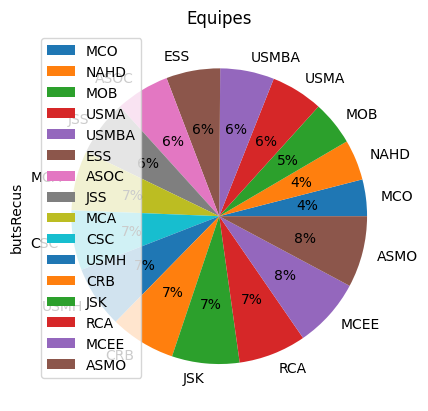

In [21]:
chart = text("SELECT equipe,butsRecus FROM (SELECT equipe ,SUM(butsRecus) butsRecus FROM (SELECT equipea equipe ,ButsEquipeB butsRecus from rencontre where ButsEquipeB>0 UNION ALL SELECT equipeb equipe,ButsEquipeA butsRecus from rencontre where ButsEquipeA>0) as p1 GROUP BY equipe)as p2 order by butsRecus")
df = pd.read_sql(chart, dbConnection)
lb= [row for row in df['equipe']] # Labels of graph
plot=df.plot.pie(title="Equipes",y='butsRecus',labels=lb,autopct='%1.0f%%')
df.head(10)

> En exploitant les données collectées auprès des buts marqués durant les rencontres, on calcule les buts recus par chaque équipe. En analysant les résultats, on constate que les clubs MCO (19 buts recus) et NAHD (21 buts recus) ont la meilleure défence et il ont recus que 4% chacun du total des buts reconnus dans le compétition. 

<a id='attack'></a>
### Equipe avec meilleure attaque

,equipe,butsmarqués
0,MCEE,40.0
1,ESS,37.0
2,MOB,36.0
3,USMA,35.0
4,JSK,33.0
5,MCA,33.0
6,ASMO,32.0
7,CSC,32.0
8,USMH,30.0
9,RCA,28.0


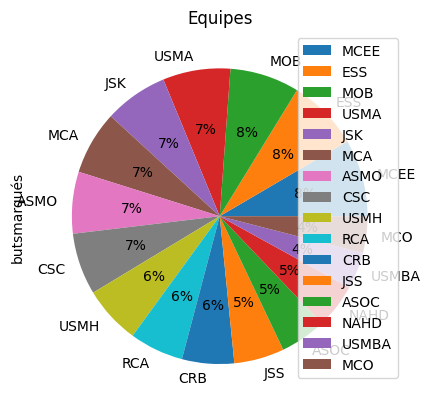

In [22]:
chart = text("SELECT equipe,butsmarqués FROM (SELECT equipe ,SUM(butsmarqués) butsmarqués FROM (SELECT equipea equipe ,ButsEquipeA butsmarqués from rencontre where ButsEquipeA>0 UNION ALL SELECT equipeb equipe,ButsEquipeB butsmarqués from rencontre where ButsEquipeB>0) as p1 GROUP BY equipe) as p2 order by butsmarqués desc")
df = pd.read_sql(chart, dbConnection)
lb= [row for row in df['equipe']] # Labels of graph
plot=df.plot.pie(title="Equipes",y='butsmarqués',labels=lb,autopct='%1.0f%%')
df.head(10)

> De même, on calcule les buts marqués par chaque équipe. En analysant les résultats, on constate que le club MCEE  qui a pu marquer 40 buts (8% du total des buts marqués) a la meilleure attque. Cela confirme le résultat obtenu précédement. Cela du au fait qu'il regroupe deux joueurs parmi ceux qui ont marqué le plus grand nombre de buts.  

<a id='classement'></a>
### Classement des clubs

,Sigle,points
0,ESS,61.0
1,MOB,59.0
2,USMH,56.0
3,MCO,55.0
4,CSC,53.0
5,CRB,53.0
6,RCA,52.0
7,ASMO,52.0
8,USMA,51.0
9,JSK,50.0


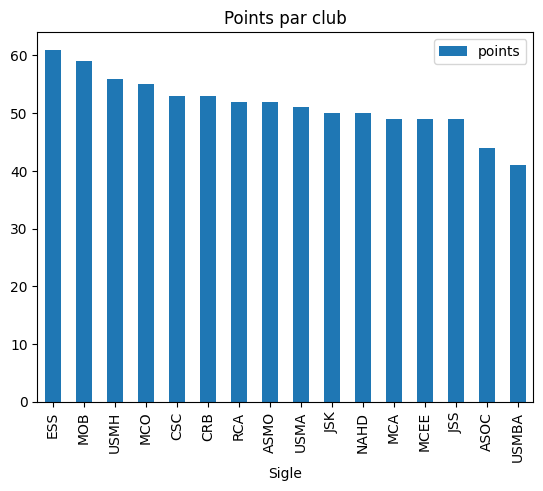

In [7]:
chart = text("Select Sigle, SUM(Case When Sigle = EQUIPEA AND BUTSEQUIPEA > BUTSEQUIPEB THEN 4 When Sigle = EQUIPEB AND BUTSEQUIPEB > BUTSEQUIPEA THEN 4 When Sigle = EQUIPEA AND BUTSEQUIPEA = BUTSEQUIPEB THEN 1 When Sigle = EQUIPEB AND BUTSEQUIPEA = BUTSEQUIPEB THEN 1 else 0 end) As points From Rencontre Join Equipe On EquipeA = Sigle Or EquipeB = Sigle Group by Sigle ORDER BY points desc;")
df = pd.read_sql(chart, dbConnection)
plot=df.plot.bar(title="Points par club",x='Sigle');
df.head(10)

On calcule les points ainsi: pour chaque rencontre gagnée on ajoute 4 points, pour chaque rencontre perdus on n'ajoute rien et pour chaque match nul on ajoute 1 point. 
On contate que le club champion de la saison est le club "ESS", et pourtant  que ce club n'a pas la meilleure défense et la deuxième meilleure attaque. On peut conclure que pour gagner, il faut travailler sur la défense et attaque en même temps. 

<a id='conclusions'></a>
## Conclusion

En conclusion, ce TP a permis d'explorer les capacités de Jupyter Notebook en matière d'analyse de données en utilisant MySQL comme SGBD. Nous avons appris comment établir une connexion entre Jupyter Notebook et une base de données MySQL, ainsi que les différentes méthodes pour lire et écrire des données.

Nous avons également vu comment utiliser Pandas, la bibliothèque Python pour la manipulation et l'analyse de données, pour effectuer des opérations de traitement sur les données stockées dans MySQL. Cela inclut la sélection, le filtrage et le tri des données, ainsi que le calcul de statistiques et l'agrégation des données.

En fin de compte, ce TP a démontré comment Jupyter Notebook peut être utilisé efficacement pour explorer et analyser des données stockées dans une base de données MySQL. Il offre une interface de développement interactive et flexible, ainsi que des outils puissants pour la manipulation et l'analyse de données, ce qui en fait un outil précieux pour les scientifiques des données et les développeurs.
